# Objetivo: 
## Predecir a usando distintas redes neuronales  la produccion de petroleo en argentina en los proximos años y ademas el precio del petroleo crudo y asi hacer un cálculo estimativo del ingreso de divisas por  el petroleo producido

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
import tensorflow as tf

#Voy a consultar la API Fred

with open('C:\\Users\\Felipe\\Desktop\\Data_Science_Road_2024\\EDA\\Economic_Data_Analysis_Fred\\API_key.txt', 'r') as file:
    api_key = file.read().strip()

#strip elimina saltos en la clave    
    
from fredapi import Fred

fred_key=api_key





In [19]:
nqn_pet=pd.read_csv('C:/Users/Felipe/Desktop/Data_Science_Road_2024/EDA/serie_tiempo_neuquen.csv')

nqn_pet['Produccion_Total_Petroleo']=nqn_pet['Produccion_Total_Petroleo']*(6.28981/1e6) #barriles de petroleo

len(nqn_pet)

nqn_pet=nqn_pet[['fecha','Produccion_Total_Petroleo']].copy()

# Convertir la columna 'fecha' a tipo datetime si aún no lo está
nqn_pet['fecha'] = pd.to_datetime(nqn_pet['fecha'])

# Establecer la columna 'fecha' como el índice
nqn_pet.set_index('fecha', inplace=True)

print(nqn_pet)


            Produccion_Total_Petroleo
fecha                                
2010-01-01                   0.002731
2010-02-01                   0.002742
2010-03-01                   0.003280
2010-04-01                   0.002754
2010-05-01                   0.002878
...                               ...
2023-07-01                   0.948677
2023-08-01                   0.906767
2023-09-01                   0.910139
2023-10-01                   0.984539
2023-11-01                   1.004743

[167 rows x 1 columns]


In [20]:
#SEARCH FOR CRUDE OIL PRICE

In [21]:
fred = Fred(api_key=fred_key)

In [22]:
Crude_oil=fred.search("crude oil prices", order_by="popularity")

In [23]:
Crude_oil.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
DCOILWTICO,DCOILWTICO,2024-01-31,2024-01-31,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-02,2024-01-22,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2024-01-24 12:16:01-06:00,77,"Definitions, Sources and Explanatory Notes (ht..."
DCOILBRENTEU,DCOILBRENTEU,2024-01-31,2024-01-31,Crude Oil Prices: Brent - Europe,1987-05-20,2024-01-22,Daily,D,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2024-01-24 12:16:02-06:00,70,"Definitions, Sources and Explanatory Notes (ht..."
WTISPLC,WTISPLC,2024-01-31,2024-01-31,Spot Crude Oil Price: West Texas Intermediate ...,1946-01-01,2023-12-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2024-01-04 12:38:02-06:00,67,This series was created by the Federal Reserve...
POILBREUSDM,POILBREUSDM,2024-01-31,2024-01-31,Global price of Brent Crude,1990-01-01,2023-12-01,Monthly,M,U.S. Dollars per Barrel,U.S. $ per Barrel,Not Seasonally Adjusted,NSA,2024-01-24 13:36:04-06:00,60,Value represents the benchmark prices which ar...
MCOILBRENTEU,MCOILBRENTEU,2024-01-31,2024-01-31,Crude Oil Prices: Brent - Europe,1987-05-01,2023-12-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2024-01-04 12:21:03-06:00,57,"Definitions, Sources and Explanatory Notes: ht..."
MCOILWTICO,MCOILWTICO,2024-01-31,2024-01-31,Crude Oil Prices: West Texas Intermediate (WTI...,1986-01-01,2023-12-01,Monthly,M,Dollars per Barrel,$ per Barrel,Not Seasonally Adjusted,NSA,2024-01-04 12:21:02-06:00,55,"Definitions, Sources and Explanatory Notes: ht..."
OVXCLS,OVXCLS,2024-01-31,2024-01-31,CBOE Crude Oil ETF Volatility Index,2007-05-10,2024-01-30,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-01-31 08:36:02-06:00,53,Exchange Traded Funds (ETFs) are shares of tru...
POILWTIUSDM,POILWTIUSDM,2024-01-31,2024-01-31,Global price of WTI Crude,1990-01-01,2023-12-01,Monthly,M,U.S. Dollars per Barrel,U.S. $ per Barrel,Not Seasonally Adjusted,NSA,2024-01-24 13:36:06-06:00,52,Value represents the benchmark prices which ar...
POILDUBUSDM,POILDUBUSDM,2024-01-31,2024-01-31,Global price of Dubai Crude,1990-01-01,2023-12-01,Monthly,M,U.S. Dollars per Barrel,U.S. $ per Barrel,Not Seasonally Adjusted,NSA,2024-01-24 13:36:10-06:00,41,Value represents the benchmark prices which ar...


In [24]:
CRUDE=fred.get_series(series_id="WTISPLC")

#CRUDE=CRUDE[['TIME', 'VALUE']]
#CRUDE.columns= ['TIME', 'VALUE'].copy()

#CRUDE = pd.to_datetime(CRUDE)

CRUDE_2010 = CRUDE[CRUDE.index.year >= 2010]

CRUDE_2010=CRUDE_2010.iloc[:-1]
print(CRUDE_2010)
print(nqn_pet)

2010-01-01    78.22
2010-02-01    76.42
2010-03-01    81.24
2010-04-01    84.48
2010-05-01    73.84
              ...  
2023-07-01    76.07
2023-08-01    81.39
2023-09-01    89.43
2023-10-01    85.64
2023-11-01    77.69
Length: 167, dtype: float64
            Produccion_Total_Petroleo
fecha                                
2010-01-01                   0.002731
2010-02-01                   0.002742
2010-03-01                   0.003280
2010-04-01                   0.002754
2010-05-01                   0.002878
...                               ...
2023-07-01                   0.948677
2023-08-01                   0.906767
2023-09-01                   0.910139
2023-10-01                   0.984539
2023-11-01                   1.004743

[167 rows x 1 columns]


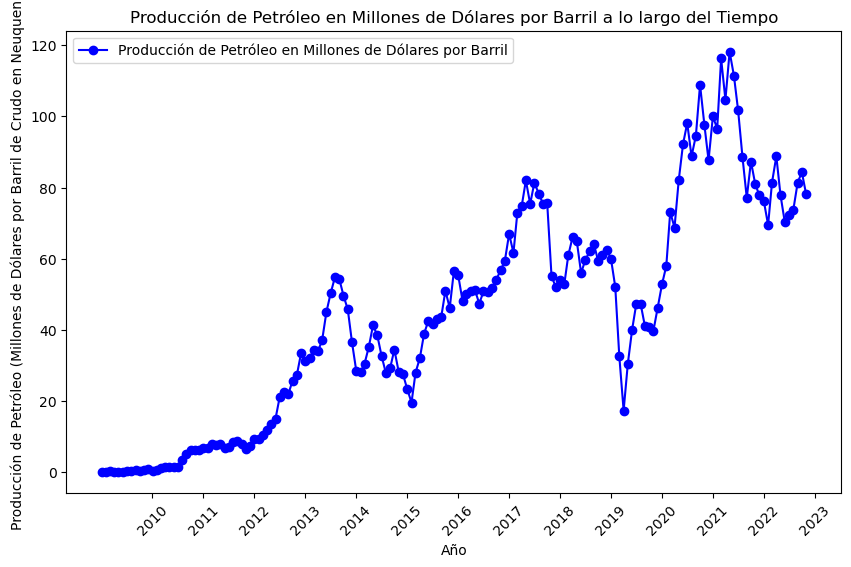

In [25]:
SMD=CRUDE_2010*nqn_pet["Produccion_Total_Petroleo"]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la serie de tiempo
ax.plot(SMD.index, SMD.values, marker='o', linestyle='-', color='b', label='Producción de Petróleo en Millones de Dólares por Barril')

# Configurar el eje x para mostrar solo años
ax.set_xticks(SMD.resample('Y').mean().index)
ax.set_xticklabels([str(year.year) for year in SMD.resample('Y').mean().index], rotation=45)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Producción de Petróleo (Millones de Dólares por Barril de Crudo en Neuquen)')
ax.set_title('Producción de Petróleo en Millones de Dólares por Barril a lo largo del Tiempo')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# Predicciones

In [35]:
#vamos a normalizar las dos series de tiempo y luego dividir en dos set de datos 70% para entrenamiento y 30% para testeo
from sklearn.preprocessing import MinMaxScaler


nqn= nqn_pet["Produccion_Total_Petroleo"].values.reshape(-1, 1)  # Reshape to a 2D array for MinMaxScaler



# Creamos el objeto MinMaxScaler
scaler_min_max_scaler = MinMaxScaler()

# Normalizamos los datos y se agrega como nueva columna

nqn=scaler_min_max_scaler.fit_transform(nqn)



nqn_pet["Produccion_Total_Petroleo"] = nqn.flatten()


nqn_pet.head()

,Produccion_Total_Petroleo
fecha,
2010-01-01,0.000249
2010-02-01,0.000256
2010-03-01,0.000655
2010-04-01,0.000265
2010-05-01,0.000357


In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop


seq_length=12 #anual
# Construir el modelo de red neuronal
#model = tf.keras.Sequential([
 #   tf.keras.layers.LSTM(32,activation="relu", input_shape=(seq_length, 1)),
  #  tf.keras.layers.LSTM(64, activation="relu"),
   # tf.keras.layers.Dense(1, activation="softmax")
#])


#model = Sequential()
#model.add(layers.LSTM(32, dropout=0.1, recurrent_dropout=0.5,
                #     return_sequences=True, input_shape=(seq_length, 1)))

#model.add(layers.LSTM(64, activation='relu',
                 #    dropout=0.1, recurrent_dropout=0.5))

#model.add(layers.Dense(1))




model = Sequential()
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5,
                     return_sequences=True, input_shape=(seq_length, 1)))

model.add(layers.GRU(64, activation='relu',
                     dropout=0.1, recurrent_dropout=0.5, return_sequences=True))

model.add(layers.GRU(128, activation='relu',
                     dropout=0.1, recurrent_dropout=0.5))


model.add(layers.Dense(1))








# Compilar el modelo'
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse','acc' ])

# Resumen del modelo
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 12, 32)            3360      
                                                                 
 gru_4 (GRU)                 (None, 12, 64)            18816     
                                                                 
 gru_5 (GRU)                 (None, 128)               74496     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 96,801
Trainable params: 96,801
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Definimos el tamaño del conjunto de entrenamiento (por ejemplo, el 70% de los datos)
train_size = int(len(nqn) * 0.6)

# Dividimos los datos en conjuntos de entrenamiento y prueba de manera secuencial
train_data, test_data = nqn[:train_size], nqn[train_size:]


seq_length= 12  # ajusta este valor según tus necesidades

# Crear las secuencias de entrada y salida para entrenamiento
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


# Convierte a arrays numpy
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [29]:
X_train.shape


(88, 12, 1)

In [30]:
X = np.array(X_train).reshape(-1, seq_length, 1)
y = np.array(y_train)

# Imprimir la forma de los datos de entrada
print("Forma de X:", X.shape)  # Salida esperada: (número de secuencias, longitud de secuencia, número de características)
print("Forma de y:", y.shape)  # Salida esperada: (número de sec



#Go_train


model.fit(X_train, y_train, epochs=15)






Forma de X: (88, 12, 1)
Forma de y: (88, 1)
Epoch 1/15
3/3 [==============================] - 8s 54ms/step - loss: 0.1974 - mse: 0.1974 - acc: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 57ms/step - loss: 0.1375 - mse: 0.1375 - acc: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 59ms/step - loss: 0.0778 - mse: 0.0778 - acc: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0299 - mse: 0.0299 - acc: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0377 - mse: 0.0377 - acc: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 55ms/step - loss: 0.0308 - mse: 0.0308 - acc: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0170 - mse: 0.0170 - acc: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 54ms/step - loss: 0.0172 - mse: 0.0172 - acc: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 55ms/step - loss: 0.016

3/3 [==============================] - 1s 12ms/step


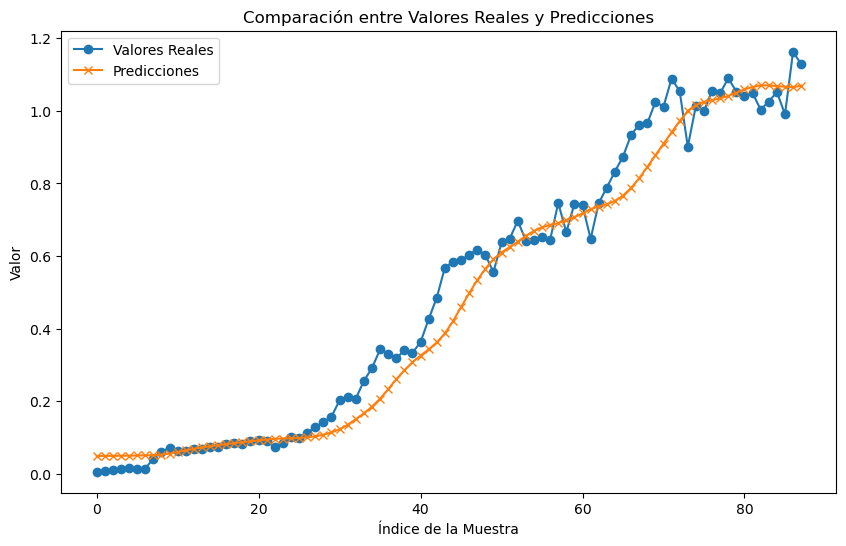

In [31]:


predictions_t=model.predict(X_train)
predictions_t=scaler_min_max_scaler.inverse_transform(predictions_t)
y_train = scaler_min_max_scaler.inverse_transform(y_train)


# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_train, label='Valores Reales', marker='o')

# Graficar las predicciones
plt.plot(predictions_t, label='Predicciones', marker='x')

plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()




2/2 [==============================] - 0s 13ms/step


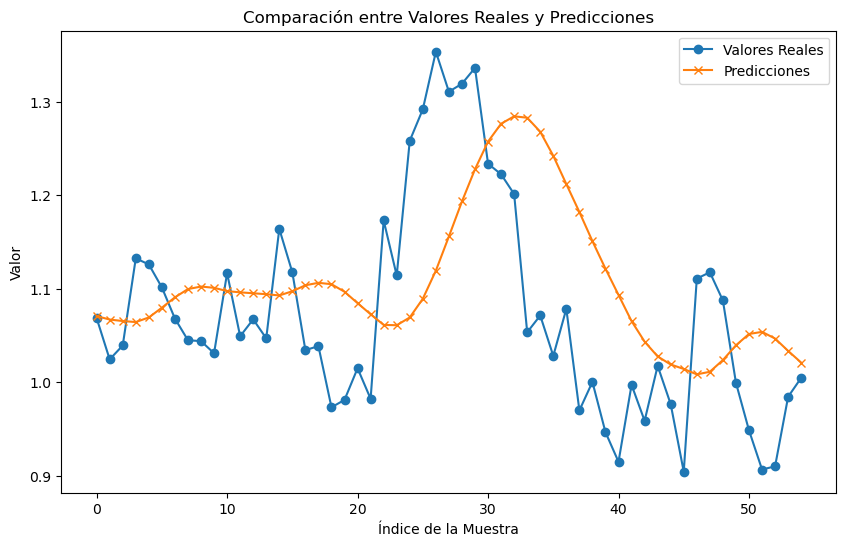

In [32]:
# Realizar predicciones con el modelo entrenado
predictions = model.predict(X_test)

predictions = scaler_min_max_scaler.inverse_transform(predictions)
y_test = scaler_min_max_scaler .inverse_transform(y_test)



# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test, label='Valores Reales', marker='o')

# Graficar las predicciones
plt.plot(predictions, label='Predicciones', marker='x')

plt.title('Comparación entre Valores Reales y Predicciones')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Valor')
plt.legend()
plt.show()



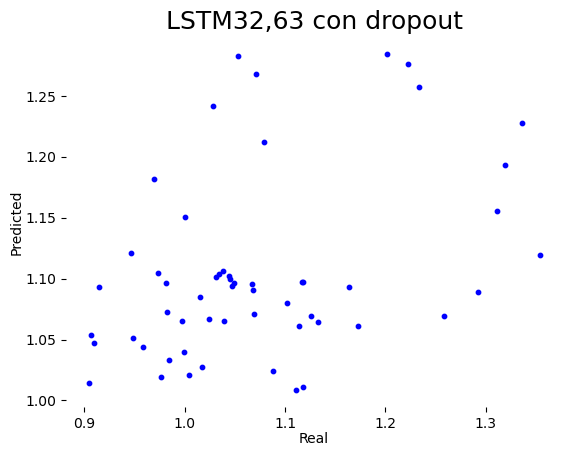

In [33]:

def graph_real_pred(y_test, y_pred_train, color, title, ax=None):
    """
    Funcion que grafica los valores reales vs. predichos
    :param y_test: valores reales
    :param y_pred_train: valores predichos
    :param color: color para el plot.
    :param title: título del gráfico
    :param ax: objeto de ejes de Matplotlib para dibujar el gráfico (opcional)
    :return: Scatterplot mostrando la relación entre el valor real y el predicho
    """
    if ax is None:
        ax = plt.gca()
    
    ax.scatter(y_test, y_pred_train, c=color, s=10)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Real', size=10, labelpad=1)
    ax.set_ylabel('Predicted', size=10, labelpad=1)
    ax.set_title(title, size=18)  # Agregamos título al gráfico




graph_real_pred(y_test, predictions,"blue","LSTM32,63 con dropout" )

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 0.012495785008775328
R^2 Score: 0.009167519108456701


Un r2 negativo significa que el modelo es realmente inapropiado para los datos y que las predicciones son peores que simplemente usar la media de los valores observados como predicción. Esto puede ocurrir cuando el modelo tiene un rendimiento muy deficiente y está realizando predicciones extremadamente alejadas de los valores reales.

In [ ]:
En primer lugar probé con una LSTM con 32 unidades (Fig. 1).

En segundo lugar uni dos LSTM con 32 y 64 unidades respectivamente. El resultado mejoró notablemente, porque lo que se buscaba era que siguiera la tendencia alsista (Fig. 2).

Asi que aumenté la profundidad agregando otra capa de 128 unidades y estos fueron los resultados (Fig. 3).


Combine una Conv1D con Maxpooling y una GRU 32 unidades (Fig. 4).

Y por último agregue una capa más GRU 64 a ver si mejoraba el resultado (Fig 5).


In [38]:
# Define future dates for the next 5 years
future_dates = pd.date_range(start=nqn_pet.index[-1] + pd.Timedelta(days=30),  periods=3*12, freq='M')

# Prepare the last sequence of scaled closing prices as input for prediction
future_seq = nqn[-seq_length:].reshape(1, seq_length, 1)

# Make predictions for the next 5 years
future_pred = []

for _ in range(3*12):
    # Predict the next value using the LSTM model
    next_pred = model.predict(future_seq)[0][0]
    
    # Append the predicted value to the list of future predictions
    future_pred.append(next_pred)
    
    # Update the input sequence for the next prediction
    future_seq = np.append(future_seq[:, 1:, :], [[[next_pred]]], axis=1)

# Inverse transform the predicted values back to the original scale
future_pred = scaler_min_max_scaler.inverse_transform(np.array(future_pred).reshape(-1, 1))



1/1 [==============================] - 0s 51ms/step


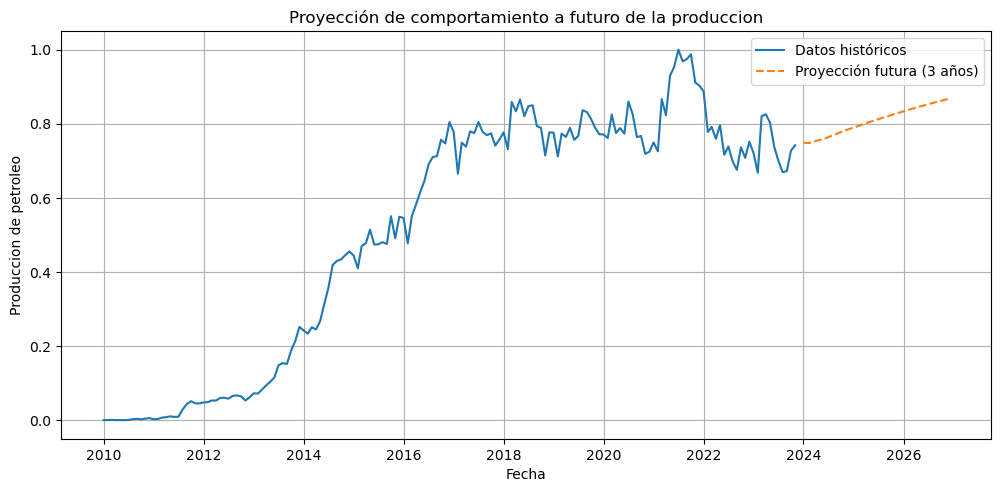

In [41]:
# Gráfico para la proyección futura


plt.figure(figsize=(12, 18))


plt.subplot(3, 1, 3)
plt.plot(nqn_pet, label='Datos históricos')
plt.plot(future_dates, future_pred[:len(future_dates)], linestyle='--', label='Proyección futura (3 años)')
plt.title('Proyección de comportamiento a futuro de la produccion')
plt.xlabel('Fecha')
plt.ylabel('Produccion de petroleo')
plt.legend()
plt.grid(True)

